### Indicaciones de medicamentos (Ingeniería de medicamentos con IA)

In [1]:
import pandas as pd #Esta línea importa la biblioteca pandas y la renombra como pd, lo que nos permite utilizar las funciones y objetos de pandas en nuestro código.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('drug_indications_database.csv')#Leer los datos de Medicamentos200.
data

#     0    1      2      3        4       5

C:\Users\luzab\AppData\Local\Temp\ipykernel_19268\61798554.py:1: DtypeWarning: Columns (14,21,26,27,28,34,38,40,41,53,54,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drug_indications_database.csv')#Leer los datos de Medicamentos200.


,DID_id,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt,chebi_id,...,ind_umls_sem_typ4,ind_umls_in_term_match,ind_umls_in_term,ind_umls_in_pt,ind_umls_in_cui,ind_umls_in_term_typ,ind_umls_in_sem_typ1,ind_umls_in_sem_typ2,ind_umls_in_sem_typ3,ind_umls_in_sem_typ4
0,1_000001,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_000002,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1_000003,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1_000004,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1_000005,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192828,2_139501,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192829,2_139502,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192830,2_139503,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192831,2_139504,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El siguiente código selecciona columnas específicas de un DataFrame utilizando la función iloc en el módulo pandas. La variable a almacena las columnas 1, 2, 3 y 5 del DataFrame, mientras que la variable b almacena las columnas 0 y 4.

In [3]:
#.iloc[Filas:,colum1,colum2, column3]

a = data.iloc[:, [1,2,3,4,5,6,7,8,9,10]]
a

,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt,chebi_id,chebi_cas_no
0,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,NaN
1,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,NaN
2,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,NaN
3,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,NaN
4,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
192828,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,NaN
192829,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,NaN
192830,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,NaN
192831,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan,37671.0,NaN


In [4]:
#Variables Categóricas
#.iloc[Filas:,colum1,colum2, column3]

a = data.iloc[:, [1,2,3,4,5,6,7,8]]
a

,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt
0,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN
1,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN
2,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN
3,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN
4,NDFRT,C0016157,Fish Oils,8016-13-5,Fish oil,ChemID+,<syn per source>,NaN
...,...,...,...,...,...,...,...,...
192828,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan
192829,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan
192830,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan
192831,CTD,D015054,Zymosan,9010-72-4,Zymosan,ChemID+,exact,(1->3)-beta-D-glucan


In [5]:
#Variables Númericas----Conversión
#.iloc[Filas:,colum1,colum2, column3]

b = data.iloc[:, [3]]
b

,drug_raw_name
0,Fish Oils
1,Fish Oils
2,Fish Oils
3,Fish Oils
4,Fish Oils
...,...
192828,Zymosan
192829,Zymosan
192830,Zymosan
192831,Zymosan


### PRE-PROCESAMIENTO

El siguiente código realiza la codificación de variables categóricas en un conjunto de datos. Aquí está la explicación paso a paso del código:

In [6]:
#Variables Númericas----Conversión.

#Esto se puede hacer utilizando el codificador de etiquetas (Label Encoder).
#Separamos el conjunto de datos en conjuntos de datos numéricos y no numéricos:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('drug_indications_database.csv') # Leer los datos de Medicamentos200

# Convertir las columnas en valores numéricos (variables categóricas)
label_encoder = LabelEncoder()
numerical_data = a.copy()
non_numerical_data =b.copy()

for column in numerical_data.columns:
    if numerical_data[column].dtype == 'object':
        numerical_data[column] = label_encoder.fit_transform(numerical_data[column])

numerical_data

C:\Users\luzab\AppData\Local\Temp\ipykernel_19268\3614968945.py:9: DtypeWarning: Columns (14,21,26,27,28,34,38,40,41,53,54,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('drug_indications_database.csv') # Leer los datos de Medicamentos200


,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt
0,5,2805,8411,15820,7728,2,0,8166
1,5,2805,8411,15820,7728,2,0,8166
2,5,2805,8411,15820,7728,2,0,8166
3,5,2805,8411,15820,7728,2,0,8166
4,5,2805,8411,15820,7728,2,0,8166
...,...,...,...,...,...,...,...,...
192828,0,15280,18040,17359,17862,2,43,65
192829,0,15280,18040,17359,17862,2,43,65
192830,0,15280,18040,17359,17862,2,43,65
192831,0,15280,18040,17359,17862,2,43,65




    Se crea una instancia del objeto LabelEncoder(), el cual se utilizará para realizar la codificación de las variables categóricas.

    Se crea una copia del DataFrame a y se asigna a la variable numerical_data. Esta copia se utilizará para almacenar los datos numéricos codificados.

    Se crea una copia del DataFrame b y se asigna a la variable non_numerical_data. Esta copia se utilizará para almacenar los datos no numéricos originales.

    El bucle for itera sobre todas las columnas del DataFrame numerical_data.

    Dentro del bucle, se verifica si el tipo de datos de la columna actual es 'object', lo cual indica que es una variable categórica.


En resumen, el código utiliza el objeto LabelEncoder para codificar las variables categóricas en un DataFrame. Los valores numéricos codificados reemplazan a los valores categóricos originales en el DataFrame resultante numerical_data.

In [7]:
a_enc = a.copy()
for col in a.columns:
    lb = LabelEncoder()
    a_enc[col] = lb.fit_transform(a[col].values)
a_enc

,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt
0,5,2805,8411,15820,7728,2,0,8166
1,5,2805,8411,15820,7728,2,0,8166
2,5,2805,8411,15820,7728,2,0,8166
3,5,2805,8411,15820,7728,2,0,8166
4,5,2805,8411,15820,7728,2,0,8166
...,...,...,...,...,...,...,...,...
192828,0,15280,18040,17359,17862,2,43,65
192829,0,15280,18040,17359,17862,2,43,65
192830,0,15280,18040,17359,17862,2,43,65
192831,0,15280,18040,17359,17862,2,43,65


In [8]:
data_1 = pd.concat([b, a_enc], axis = 1)

### Evaluando los datos

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Comprobando el recuento, mínimo, máximo y promedio para los datos.

In [10]:
a.describe()

,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt
count,192833,180671,192833,171494,171494,171494,171494,117155
unique,11,20654,34137,18419,18645,6,72,8166
top,CTD,L01XX,Cocaine,50-36-2,Cocaine,ChemID+,exact,cocaine
freq,81214,868,522,654,654,165628,152736,532


In [11]:
numerical_data.describe()

,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt
count,192833.000000,192833.000000,192833.000000,192833.000000,192833.000000,192833.000000,192833.000000,192833.000000
mean,3.647768,12243.053985,15287.392578,10521.393833,10522.063915,2.419425,42.567320,6049.485451
std,3.840073,6125.393287,9166.093476,5507.044968,5597.702273,1.287591,15.886342,2365.812949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7371.000000,7472.000000,6036.000000,5591.000000,2.000000,43.000000,4090.000000
50%,3.000000,13701.000000,14174.000000,10723.000000,10615.000000,2.000000,43.000000,6912.000000
75%,8.000000,16504.000000,22357.000000,15184.000000,15638.000000,2.000000,43.000000,8166.000000
max,10.000000,20654.000000,34136.000000,18419.000000,18645.000000,6.000000,72.000000,8166.000000


### Comprobando valores nulos

In [12]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192833 entries, 0 to 192832
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   src_nm         192833 non-null  int32
 1   src_id         192833 non-null  int32
 2   drug_raw_name  192833 non-null  int32
 3   cas_cas_no     192833 non-null  int32
 4   cas_pt         192833 non-null  int32
 5   cas_source     192833 non-null  int32
 6   cas_match      192833 non-null  int32
 7   chebi_pt       192833 non-null  int32
dtypes: int32(8)
memory usage: 5.9 MB


In [13]:
numerical_data.duplicated().sum()

142677

### Visualizando las clases objetivo

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
numerical_data.head(5)

,src_nm,src_id,drug_raw_name,cas_cas_no,cas_pt,cas_source,cas_match,chebi_pt
0,5,2805,8411,15820,7728,2,0,8166
1,5,2805,8411,15820,7728,2,0,8166
2,5,2805,8411,15820,7728,2,0,8166
3,5,2805,8411,15820,7728,2,0,8166
4,5,2805,8411,15820,7728,2,0,8166


In [16]:
numerical_data['src_nm'].unique()

array([ 5,  4,  1,  7,  2,  6,  3,  8,  9, 10,  0])

<Axes: xlabel='src_nm', ylabel='count'>

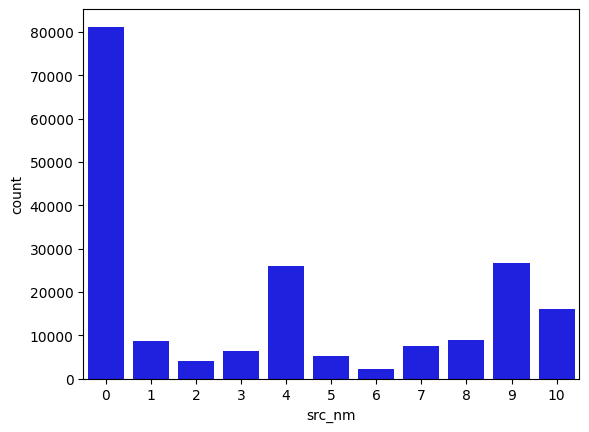

In [18]:
sns.countplot(x =numerical_data['src_nm'], color= 'blue')

### Dividiendo en características y objetivo



    Las características son las variables independientes y sus valores determinan la clase de la característica.

    El objetivo es la variable dependiente y se espera que predigamos correctamente la clase objetivo.


In [19]:
X = numerical_data.drop('src_nm', axis = 1)
y = numerical_data['src_nm']

### Función para la Evaluación del Modelo

In [20]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(cm.shape[0], cm.shape[1])
    sns.heatmap(cm, annot=labels, cmap='Greens', fmt='')

## Construcción de modelos para Árboles de Decisión

clf = Clasificador de Árbol de Decisión

In [21]:
clf = DecisionTreeClassifier()

## Utilizando validación cruzada para encontrar los parámetros de mayor precisión.
Estos parámetros y sus respectivos valores se utilizan para buscar la combinación óptima que brinde el mejor rendimiento al entrenar un modelo de Árbol de Decisión.

In [22]:
param_dist = {'max_depth': [None, 2, 3, 4, 5, 6],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [5, 10, 12],
             'max_leaf_nodes': [10, 15, 20, None]}

El código realiza una búsqueda aleatoria de hiperparámetros para encontrar la mejor combinación de parámetros para el modelo de Árbol de Decisión. Luego, ajusta el modelo utilizando los datos proporcionados y los parámetros óptimos encontrados.

In [23]:
rcv = RandomizedSearchCV(clf, param_distributions = param_dist, n_iter = 10, cv = 5)
rcv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [10, 15, 20, None],
                                        'min_samples_split': [5, 10, 12]})

#### El atributo best_score_ en el contexto de aprendizaje automático se refiere al mejor puntaje obtenido durante el proceso de validación cruzada.

In [24]:
rcv.best_score_

0.7145249291758599

El atributo best_estimator_ en el contexto de aprendizaje automático se refiere al mejor estimador o modelo obtenido durante el proceso de validación cruzada. La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo de aprendizaje automático en un conjunto de datos, y consiste en dividir el conjunto de datos en partes más pequeñas llamadas "folds" o pliegues.

In [25]:
rcv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=10, min_samples_split=5)

La línea de código X_train, X_test, y_train, y_test = train_test_split(X, y) se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba. 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Construyendo el modelo de Árbol de Decisión que mejor se ajuste

El código dt = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=15, min_samples_split=12).fit(X_train, y_train) se utiliza para crear y entrenar un modelo de clasificación basado en un árbol de decisión utilizando el clasificador DecisionTreeClassifier de scikit-learn.

In [27]:
dt = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 15, min_samples_split = 12).fit(X_train, y_train)
type(dt)

sklearn.tree._classes.DecisionTreeClassifier

dt.score(X_train, y_train) y dt.score(X_test, y_test) son llamadas al método score() aplicadas al modelo de clasificación dt para calcular la precisión del modelo en los conjuntos de entrenamiento y prueba, respectivamente.

In [28]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.757854851200354, 0.7579705034329689)

Como podemos observar, hemos logrado una precisión del 100% tanto para los conjuntos de entrenamiento como de prueba. Nuestro modelo es perfecto o casi perfecto.

### Evaluación de nuestro modelo

* La figura a continuación mostrará cómo nuestro modelo ha predicho los valores y también mostrará las cantidades.
* Los bloques en la diagonal son los valores predichos correctamente y los bloques fuera de la diagonal son los valores predichos incorrectamente.


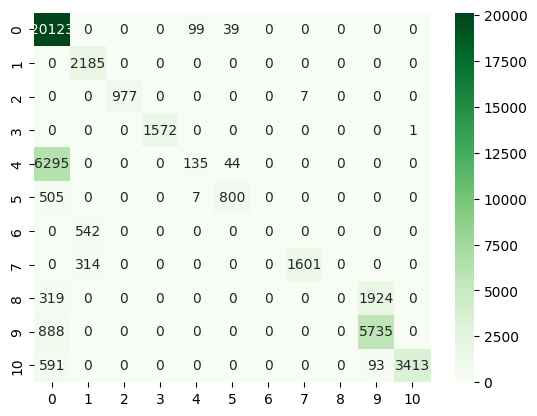

In [29]:
model_evaluation(dt)